In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image  # To display images in jupyter notebook
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
customer_demographic_df = pd.read_excel(io='CustomerDemographic.xlsx')
customer_address_df = pd.read_excel(io='CustomerAddress.xlsx')
transactions_df = pd.read_excel(io='Transactions.xlsx')

In [3]:
customer_demographic_df.drop(labels='Unnamed: 0',
    axis=1, inplace=True)
customer_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,66.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0


In [4]:
customer_address_df.drop(labels='Unnamed: 0',
    axis=1, inplace=True)
customer_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,Victoria,Australia,9


In [5]:
# <<--- MErge customer demographic and address --->>

In [6]:
merged_customer_demographic_address = customer_demographic_df.merge(right=customer_address_df, how='inner')

In [7]:
merged_customer_demographic_address.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59.0,0 Holy Cross Court,4211,Queensland,Australia,9
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,54.0,9 Oakridge Court,3216,Victoria,Australia,9


In [8]:
# merged_customer_demographic_address.info()

In [9]:
# <<--- Drop last name --->>

In [10]:
merged_customer_demographic_address.drop(labels='last_name', axis=1, inplace=True)

In [11]:
merged_customer_demographic_address.dropna(axis=0, subset=['DOB'], inplace=True)

In [12]:
merged_customer_demographic_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3906 entries, 0 to 3992
Data columns (total 17 columns):
customer_id                            3906 non-null int64
first_name                             3906 non-null object
gender                                 3906 non-null object
past_3_years_bike_related_purchases    3906 non-null int64
DOB                                    3906 non-null datetime64[ns]
job_title                              3411 non-null object
job_industry_category                  3251 non-null object
wealth_segment                         3906 non-null object
deceased_indicator                     3906 non-null object
owns_car                               3906 non-null object
tenure                                 3906 non-null float64
Age                                    3906 non-null float64
address                                3906 non-null object
postcode                               3906 non-null int64
state                                  3906 no

In [13]:
# <<--- Divide age into categories --->>

In [14]:
age_categories = []

for age in merged_customer_demographic_address['Age']:
    if 0 < age <= 14:
        age_categories.append('Children')
    elif 15 <= age <= 24:
        age_categories.append('Youth')
    elif 25 <= age <= 64:
        age_categories.append('Adults')
    elif age > 64:
        age_categories.append('Seniors')

In [15]:
merged_customer_demographic_address['Age_Categories'] = age_categories

In [16]:
# Save merged data frame to excel file

merged_customer_demographic_address.to_excel(excel_writer='merged_customer_demographic_address.xlsx',
    sheet_name='Sheet1')

In [17]:
merged_customer_demographic_address.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation,Age_Categories
0,1,Laraine,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,67.0,060 Morning Avenue,2016,New South Wales,Australia,10,Seniors
1,2,Eli,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,40.0,6 Meadow Vale Court,2153,New South Wales,Australia,10,Adults
2,4,Talbot,M,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,59.0,0 Holy Cross Court,4211,Queensland,Australia,9,Adults
3,5,Sheila-kathryn,F,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,43.0,17979 Del Mar Point,2448,New South Wales,Australia,4,Adults
4,6,Curr,M,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,54.0,9 Oakridge Court,3216,Victoria,Australia,9,Adults


In [18]:
# Image('image1.png')

FileNotFoundError: No such file or directory: 'image1.png'

FileNotFoundError: No such file or directory: 'image1.png'

<IPython.core.display.Image object>

## Check weather the increase in count of the customers in NSW is due to population factor.

### Here we will just compare NSW with VIC,  as VIC is next smallest count of customers than NSW, and QLD and VIC have approx same count of customers.

### Capital of NSW and VIC are Sydney and Melbourne respectively, so they both are one of the best cities in Australia.

In [19]:
# Percentage difference (a kind of weighted difference)

def percentage_difference(value1, value2):
    per_def = round(((max(value1, value2) - min(value1, value2))/min(value1, value2))*100, 2)
    print(f'{max(value1, value2)} is {per_def}% greater than {min(value1, value2)}')

## So we make a Null Hypothesis and Alternate Hypothesis
### Null Hypothesis: Percentage difference of Population and Customer counts for both NSW and VIC are approximately same.
### Alternate Hypothesis: Percentage difference of Population and Customer counts of NSW is greater than VIC.

In [20]:
# Populations:
#     NSW: 8,128,984
#     VIC: 6,651,074

In [21]:
# Percentage difference of Population

percentage_difference(8128984, 6651074)

8128984 is 22.22% greater than 6651074


In [22]:
# Customer Counts:
#     NSW: 2088
#     VIC: 997

In [23]:
# Percentage difference of Customers

percentage_difference(2088, 997)

2088 is 109.43% greater than 997


### Results: You can see from the above results that Percentage difference of Population and Customer counts of NSW is quite greater than VIC. So Null Hypothesis is accepted. We conclude that Sales of the Cycles are in real higher in NSW than VIC. 

In [24]:
transactions_df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [25]:
# transactions_df

In [26]:
transactions_df['online_order'].replace(to_replace={0.0: False, 1.0:True}, inplace=True)

In [27]:
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Profit
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


In [28]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19625 entries, 0 to 19624
Data columns (total 14 columns):
transaction_id             19625 non-null int64
product_id                 19625 non-null int64
customer_id                19625 non-null int64
transaction_date           19625 non-null datetime64[ns]
online_order               19273 non-null object
order_status               19625 non-null object
brand                      19625 non-null object
product_line               19625 non-null object
product_class              19625 non-null object
product_size               19625 non-null object
list_price                 19625 non-null float64
standard_cost              19625 non-null float64
product_first_sold_date    19625 non-null datetime64[ns]
Profit                     19625 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(6)
memory usage: 2.1+ MB


In [29]:
merge_customer_demographic_address_transactions = transactions_df.merge(right=merged_customer_demographic_address, how='inner')

In [30]:
merge_customer_demographic_address_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,deceased_indicator,owns_car,tenure,Age,address,postcode,state,country,property_valuation,Age_Categories
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,65.0,984 Hoepker Court,3064,Victoria,Australia,6,Seniors
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,...,N,Yes,10.0,65.0,984 Hoepker Court,3064,Victoria,Australia,6,Seniors
2,18923,62,2950,2017-04-26,False,Approved,Solex,Standard,medium,medium,...,N,Yes,10.0,65.0,984 Hoepker Court,3064,Victoria,Australia,6,Seniors
3,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,...,N,Yes,10.0,41.0,4 Shopko Circle,2196,New South Wales,Australia,5,Adults
4,6862,4,3120,2017-10-05,False,Approved,Giant Bicycles,Standard,high,medium,...,N,Yes,10.0,41.0,4 Shopko Circle,2196,New South Wales,Australia,5,Adults


In [31]:
merge_customer_demographic_address_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19144 entries, 0 to 19143
Data columns (total 31 columns):
transaction_id                         19144 non-null int64
product_id                             19144 non-null int64
customer_id                            19144 non-null int64
transaction_date                       19144 non-null datetime64[ns]
online_order                           18801 non-null object
order_status                           19144 non-null object
brand                                  19144 non-null object
product_line                           19144 non-null object
product_class                          19144 non-null object
product_size                           19144 non-null object
list_price                             19144 non-null float64
standard_cost                          19144 non-null float64
product_first_sold_date                19144 non-null datetime64[ns]
Profit                                 19144 non-null float64
first_name           

In [32]:
merge_customer_demographic_address_transactions.to_excel(excel_writer='merge_customer_demographic_address_transactions.xlsx',
    sheet_name='Sheet1')

In [33]:
# correlation matrix used for checking multicolinearity
corr_matrix = merge_customer_demographic_address_transactions.corr()  # correlation matrix
corr_matrix

,transaction_id,product_id,customer_id,list_price,standard_cost,Profit,past_3_years_bike_related_purchases,tenure,Age,postcode,property_valuation
transaction_id,1.000000,-0.011126,0.003504,-0.004788,-0.001022,-0.004822,-0.002863,0.006417,-0.005065,0.004885,-0.002498
product_id,-0.011126,1.000000,0.005385,0.090508,0.039213,0.074777,-0.000343,-0.007666,-0.007473,0.011606,-0.003298
customer_id,0.003504,0.005385,1.000000,0.011284,0.006045,0.008372,0.008014,-0.023878,-0.025643,0.023983,-0.008470
list_price,-0.004788,0.090508,0.011284,1.000000,0.552804,0.727815,0.006558,-0.005635,-0.002954,0.010424,-0.009860
standard_cost,-0.001022,0.039213,0.006045,0.552804,1.000000,-0.169125,-0.009558,-0.015108,0.000396,0.005503,0.000286
Profit,-0.004822,0.074777,0.008372,0.727815,-0.169125,1.000000,0.015621,0.005769,-0.003820,0.007800,-0.011898
past_3_years_bike_related_purchases,-0.002863,-0.000343,0.008014,0.006558,-0.009558,0.015621,1.000000,-0.021979,-0.040275,-0.016831,0.012636
tenure,0.006417,-0.007666,-0.023878,-0.005635,-0.015108,0.005769,-0.021979,1.000000,0.443462,0.009381,-0.019534
Age,-0.005065,-0.007473,-0.025643,-0.002954,0.000396,-0.003820,-0.040275,0.443462,1.000000,-0.016189,0.011864
postcode,0.004885,0.011606,0.023983,0.010424,0.005503,0.007800,-0.016831,0.009381,-0.016189,1.000000,-0.520567


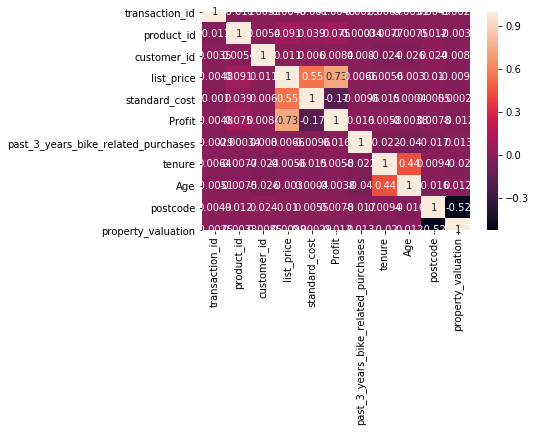

In [34]:
# Heatmap of corelation matrix
ax = sns.heatmap(data=corr_matrix, annot=True)

# below two lines are just to put the heat map or matrix properly 
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom - 0.5, top + 0.5)

In [35]:
df = pd.read_excel(io='KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')

In [36]:
import datetime
df['Age'] = [datetime.date.today().year - date.year if type(date) == pd._libs.tslibs.timestamps.Timestamp else np.nan for date in df['DOB']]

In [37]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.718750,63.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,Australia,11,0.49,0.4900,0.612500,0.520625,1,1,1.718750,50.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,Australia,5,0.54,0.5400,0.540000,0.540000,1,1,1.718750,46.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,Australia,1,0.95,1.1875,1.187500,1.187500,4,4,1.703125,41.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,Australia,9,1.10,1.1000,1.375000,1.375000,4,4,1.703125,55.0


In [38]:
filter1 = (df['property_valuation'] == 7) | (df['property_valuation'] == 8) | (df['property_valuation'] == 9) | (df['property_valuation'] == 10)
df = df[filter1]

In [39]:
filter2 = (df['job_industry_category'] == 'Financial Services') | (df['job_industry_category'] == 'Health') | (df['job_industry_category'] == 'Manufacturing')
df = df[filter2]

In [40]:
filter3 = (df['Age'] <= 45) & (35 <= df['Age']) 
df = df[filter3]

In [41]:
filter4 = (df['wealth_segment'] == 'Mass Customer')
df = df[filter4]

In [42]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,country,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value,Age
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,Australia,7,1.05,1.05,1.0500,0.892500,6,6,1.671875,44.0
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,...,Australia,10,0.42,0.42,0.5250,0.446250,14,14,1.593750,44.0
17,Winnifred,Beswetherick,Female,83,1976-06-08,Actuary,Financial Services,Mass Customer,N,No,...,Australia,10,0.73,0.73,0.9125,0.775625,17,17,1.546875,44.0
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,Australia,8,0.41,0.41,0.4100,0.348500,38,38,1.437500,41.0
41,Colene,Fishleigh,Female,24,1985-03-14,Design Engineer,Financial Services,Mass Customer,N,No,...,Australia,10,1.10,1.10,1.3750,1.168750,42,42,1.421875,35.0


In [43]:
df['Full_Name'] = df['first_name'] + ' ' + df['last_name']

In [44]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value,Age,Full_Name
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,7,1.05,1.05,1.0500,0.892500,6,6,1.671875,44.0,Rutledge Hallt
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,...,10,0.42,0.42,0.5250,0.446250,14,14,1.593750,44.0,Melba Spellacy
17,Winnifred,Beswetherick,Female,83,1976-06-08,Actuary,Financial Services,Mass Customer,N,No,...,10,0.73,0.73,0.9125,0.775625,17,17,1.546875,44.0,Winnifred Beswetherick
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,8,0.41,0.41,0.4100,0.348500,38,38,1.437500,41.0,Mitchell MacCague
41,Colene,Fishleigh,Female,24,1985-03-14,Design Engineer,Financial Services,Mass Customer,N,No,...,10,1.10,1.10,1.3750,1.168750,42,42,1.421875,35.0,Colene Fishleigh


In [45]:
# final_df.to_excel(excel_writer='Customer_Focus.xlsx',
#     sheet_name='Sheet1')

In [46]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value,Age,Full_Name
6,Rutledge,Hallt,Male,23,1976-10-06,Compensation Analyst,Financial Services,Mass Customer,N,No,...,7,1.05,1.0500,1.050000,0.892500,6,6,1.671875,44.0,Rutledge Hallt
13,Melba,Spellacy,Female,38,1976-12-09,VP Marketing,Health,Mass Customer,N,No,...,10,0.42,0.4200,0.525000,0.446250,14,14,1.593750,44.0,Melba Spellacy
17,Winnifred,Beswetherick,Female,83,1976-06-08,Actuary,Financial Services,Mass Customer,N,No,...,10,0.73,0.7300,0.912500,0.775625,17,17,1.546875,44.0,Winnifred Beswetherick
37,Mitchell,MacCague,Male,58,1979-04-11,NaN,Manufacturing,Mass Customer,N,No,...,8,0.41,0.4100,0.410000,0.348500,38,38,1.437500,41.0,Mitchell MacCague
41,Colene,Fishleigh,Female,24,1985-03-14,Design Engineer,Financial Services,Mass Customer,N,No,...,10,1.10,1.1000,1.375000,1.168750,42,42,1.421875,35.0,Colene Fishleigh
48,Gale,Disbrow,Female,59,1977-05-14,Cost Accountant,Financial Services,Mass Customer,N,Yes,...,7,0.58,0.7250,0.725000,0.616250,46,46,1.407812,43.0,Gale Disbrow
55,Martelle,Tuppeny,Female,52,1981-02-03,Marketing Assistant,Manufacturing,Mass Customer,N,No,...,10,0.99,0.9900,1.237500,1.051875,54,54,1.381250,39.0,Martelle Tuppeny
82,Esther,Rooson,Female,14,1981-02-22,NaN,Financial Services,Mass Customer,N,No,...,9,0.80,0.8000,1.000000,0.850000,78,78,1.337500,39.0,Esther Rooson
91,Patricia,Everix,Female,34,1978-02-19,Director of Sales,Health,Mass Customer,N,No,...,7,0.49,0.4900,0.490000,0.416500,89,89,1.312500,42.0,Patricia Everix
133,Nowell,Preddy,Male,29,1985-07-23,NaN,Manufacturing,Mass Customer,N,No,...,9,0.84,0.8400,1.050000,0.892500,133,133,1.237500,35.0,Nowell Preddy


In [47]:
t_df = pd.read_excel(io='KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList')

In [54]:
t_df[t_df['first_name'] == 'Chickie']


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Column1,Column2,Column3,Column4,Column5,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.87,1.0875,1.359375,1.155469,1,1,1.71875
